<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9154 entries, 0 to 9153
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               9154 non-null   float64
 1   Hardness         9154 non-null   float64
 2   Solids           9154 non-null   float64
 3   Chloramines      9154 non-null   float64
 4   Sulfate          9154 non-null   float64
 5   Conductivity     9154 non-null   float64
 6   Organic_carbon   9154 non-null   float64
 7   Trihalomethanes  9154 non-null   float64
 8   Turbidity        9154 non-null   float64
 9   Potability       9154 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 715.3 KB
None
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  9154.000000  9154.000000   9154.000000  9154.000000  9154.000000   
mean      7.080220   196.644295  21991.477503     7.124781   333.502085   
std       1.500583    32.275301   8602.093211     1.582069 

C:\Users\Ancu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


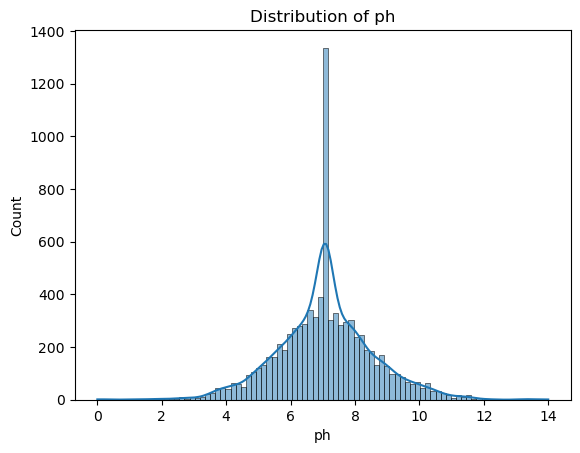

C:\Users\Ancu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


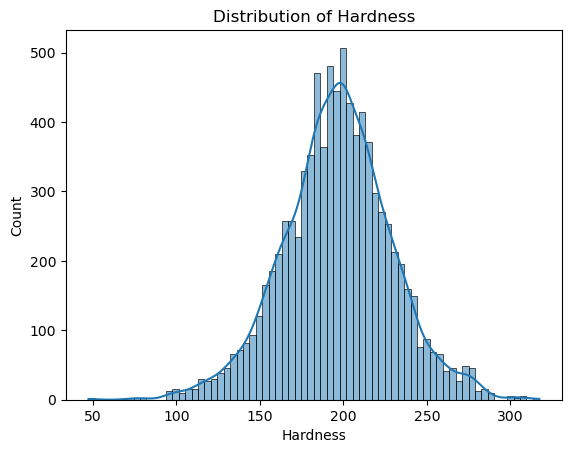

C:\Users\Ancu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


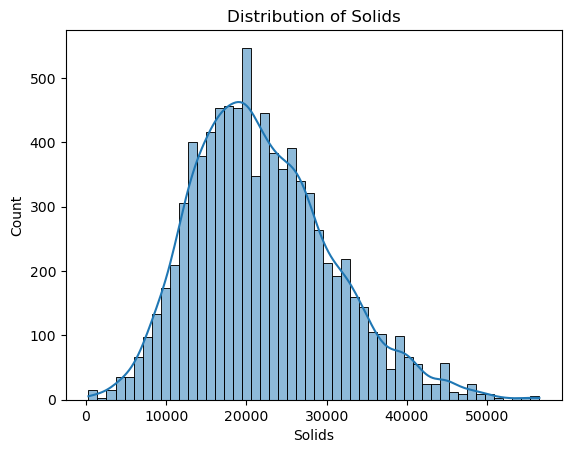

C:\Users\Ancu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


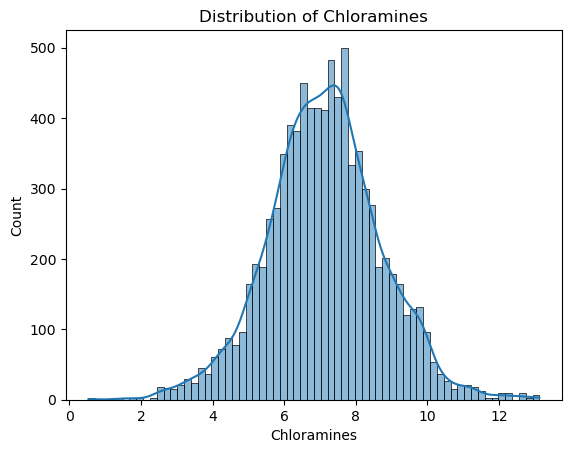

C:\Users\Ancu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


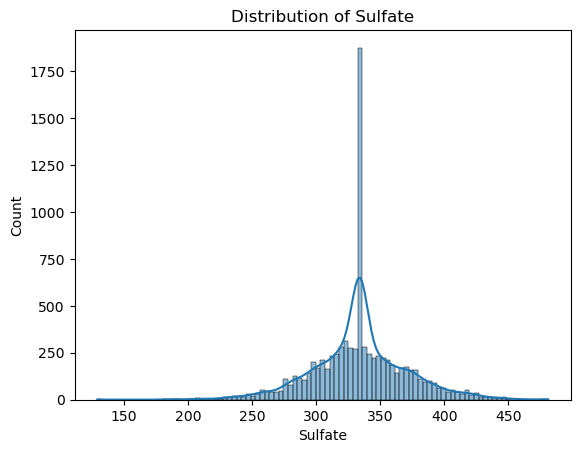

C:\Users\Ancu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


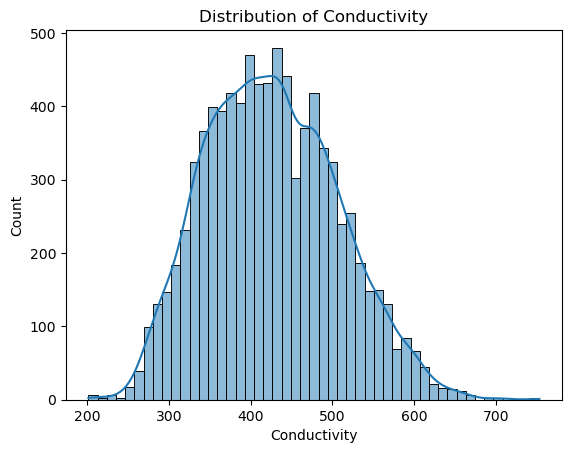

C:\Users\Ancu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


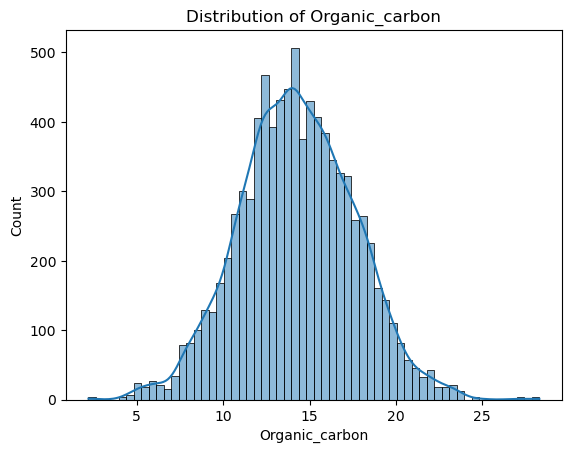

C:\Users\Ancu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


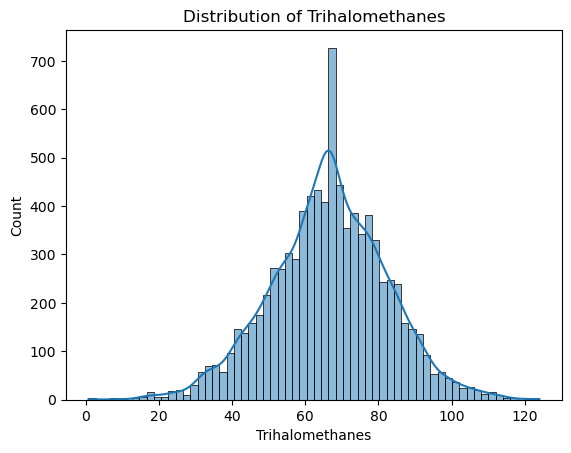

C:\Users\Ancu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


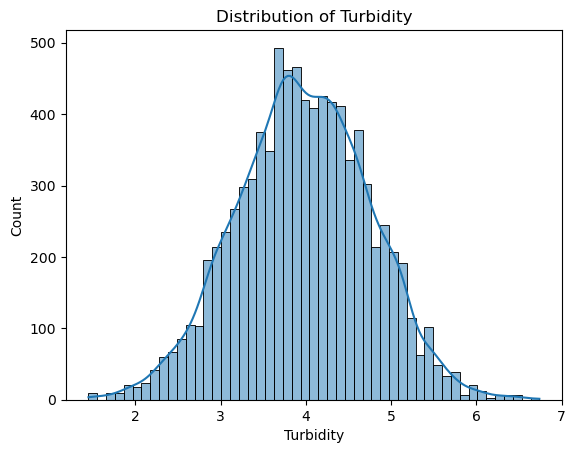

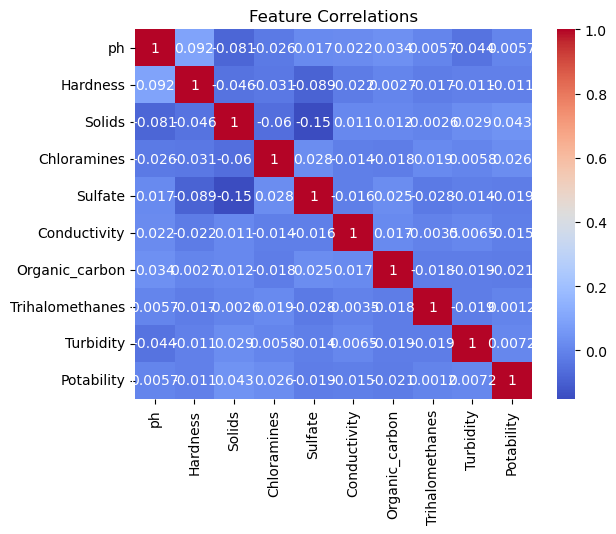

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       898
           1       0.99      0.93      0.96       549

    accuracy                           0.97      1447
   macro avg       0.97      0.96      0.97      1447
weighted avg       0.97      0.97      0.97      1447

ROC-AUC Score: 0.9985273893412197


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np

# Load dataset
file_path = "water_potability-updated.csv"  
data = pd.read_csv(file_path)

# Summary
print(data.info())
print(data.describe())

# Check missing values
print(data.isnull().sum())


# Handling missing values with mean imputation
data.fillna(data.mean(), inplace=True)

# Checking for duplicates
data.drop_duplicates(inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distributions
for column in data.columns[:-1]:  # Exclude target
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


from sklearn.preprocessing import StandardScaler

# Remove outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop("Potability", axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_scaled["Potability"] = data["Potability"].values


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Splitting the dataset
X = data_scaled.drop("Potability", axis=1)
y = data_scaled["Potability"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)


from sklearn.metrics import roc_curve, auc

# Feature importance
importance = model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

